In [2]:
using DelimitedFiles
using PyPlot
using Printf

# 常数来自Google
const me = 9.10938356e-31
const ma = 1.66053904e-27
const h = 6.62607004e-34
const c = 299792458.0
const G = 6.67408e-11
const m_sun = 1.9891e30
const mue = 2.0                      # 设 mue = 2.0, 取决于星体的物质组成
const lambda = h / (2π * me * c)
const K1 = me * c^2 / lambda^3
const K2 = ma * mue / (3π^2 * lambda^3)
const K = 9π^2 * K2^2 * G / K1

const dr = 100.0 # dr 为每次积分长度

100.0

In [3]:
function calculate_one_rho(rho_center::Float64)
    m::Float64 = 0
    r::Float64 = 0
    rho::Float64 = rho_center
    x::Float64 = 0
    drho::Float64 = 0
    while rho > 0.
        x = (rho / K2) ^ (1/3)
        r += dr
        m += 4π * r^2 * rho * dr
        drho = -K * x * sqrt(1 + x^2) * m * dr / r^2
        rho += drho
    end
    return m, r
end

calculate_one_rho (generic function with 1 method)

In [4]:
function draw(m::Array{Float64}, r::Array{Float64})
    m = m ./ m_sun
    r = r ./ 1000
    xlabel("\$R/\\mathrm{km}\$")
    ylabel("\$M/M_{sun}\$")
    idx = argmax(m)
    text = @sprintf("(%.1f, %.2f)", r[idx], m[idx])
    annotate(text, xy=(r[idx], m[idx]))
    plot(r, m, "+")
    plot(r[idx], m[idx], "o", color="red")
end

draw (generic function with 1 method)

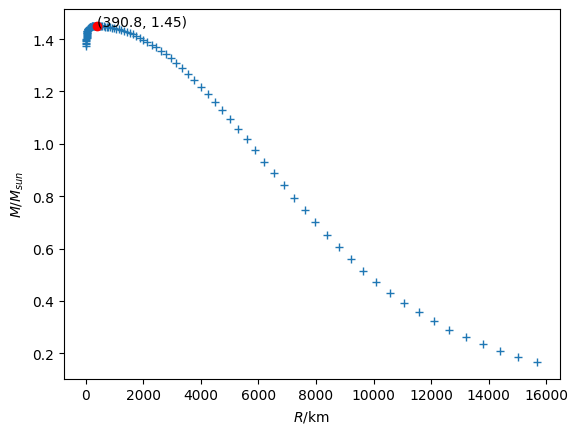

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8bffda9470>

In [5]:
m = Array{Float64}(undef, 100)
r = Array{Float64}(undef, 100)
for i=1:100
    m[i], r[i] = calculate_one_rho(exp(i/4.)*1e8)
end

# 保存结果
#open("temp.txt", "w") do io
#    writedlm(io, [m r], ',')
#end

draw(m, r)